# 임베딩(Embedding)

* 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델 투입도 가능

## 인코딩(Encoding)

* 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
* 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
* 이러한 작업을 인코딩이라고 함

* 텍스트 처리에서는 주로 정수 인코딩, 원 핫 인코딩을 사용

### 정수 인코딩

#### dictionary를 이용한 정수 인코딩

* 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [1]:
text = '건설회사 우발부채는 중요한 정보임에도 현재 건설회사 주석 공시로는 정보이용자들에게 필요한 사항을 확인하기 어렵다.'
tokens = [x for x in text.split(' ')]
unique = list(set(tokens))

In [2]:
unique

['우발부채는',
 '건설회사',
 '중요한',
 '정보이용자들에게',
 '사항을',
 '확인하기',
 '어렵다.',
 '필요한',
 '주석',
 '현재',
 '정보임에도',
 '공시로는']

In [3]:
token2index = {}
for i in range(len(unique)):
    token2index[unique[i]] = i   

In [4]:
token2index

{'우발부채는': 0,
 '건설회사': 1,
 '중요한': 2,
 '정보이용자들에게': 3,
 '사항을': 4,
 '확인하기': 5,
 '어렵다.': 6,
 '필요한': 7,
 '주석': 8,
 '현재': 9,
 '정보임에도': 10,
 '공시로는': 11}

In [5]:
encode = [token2index[x] for x in tokens]
encode

[1, 0, 2, 10, 9, 1, 8, 11, 3, 7, 4, 5, 6]

#### keras를 이용한 정수 인코딩

* 정수 인코딩은 단어에 정수로 레이블을 부여
* `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트 처리에 필요한 도구들을 지원
* 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게끔 설정

In [6]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'건설회사': 1, '우발부채는': 2, '중요한': 3, '정보임에도': 4, '현재': 5, '주석': 6, '공시로는': 7, '정보이용자들에게': 8, '필요한': 9, '사항을': 10, '확인하기': 11, '어렵다': 12}
[1, 2, 3, 4, 5, 1, 6, 7, 8, 9, 10, 11, 12]


### 원 핫 인코딩(One-Hot Encoding)

#### 조건문과 반복문을 이용한 원 핫 인코딩

* 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
* 원 핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환   

In [7]:
import numpy as np

one_hot = []
for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i]-1):
            temp.append(1)
        else:
            temp.append(0)
    one_hot.append(temp)
    
np.array(one_hot)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

#### keras를 이용한 원 핫 인코딩

* `keras`에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 `to_categorical()` 함수를 제공

In [8]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

## IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [49]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

### 데이터 로드

In [50]:
num_words = 1000   #등장빈도 순위 1000위까지의 단어만 사용(즉, 단어 집합의 크기가 1000)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [51]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

### 데이터 확인
- 긍정: 1
- 부정: 0

앞의 세 개 훈련 데이터만 확인해보자

In [52]:
x_train[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

In [53]:
y_train[:3]

array([1, 0, 0], dtype=int64)

In [54]:
for i in range(3):
    if y_train[i] == 0:
        print('부정 =>', x_train[i])
    else:
        print('긍정 =>', x_train[i])
    print('\n')

긍정 => [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


부정 => [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [55]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [56]:
max_len = 100
padded_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
padded_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [57]:
print(len(x_train[0]), '=>', len(padded_x_train[0]))

218 => 100


In [58]:
print(len(x_test[0]), '=>', len(padded_x_test[0]))

68 => 100


In [59]:
# 데이터의 길이가 같아졌다!
padded_x_train[:3]

array([[  2,  33,   6,  22,  12, 215,  28,  77,  52,   5,  14, 407,  16,
         82,   2,   8,   4, 107, 117,   2,  15, 256,   4,   2,   7,   2,
          5, 723,  36,  71,  43, 530, 476,  26, 400, 317,  46,   7,   4,
          2,   2,  13, 104,  88,   4, 381,  15, 297,  98,  32,   2,  56,
         26, 141,   6, 194,   2,  18,   4, 226,  22,  21, 134, 476,  26,
        480,   5, 144,  30,   2,  18,  51,  36,  28, 224,  92,  25, 104,
          4, 226,  65,  16,  38,   2,  88,  12,  16, 283,   5,  16,   2,
        113, 103,  32,  15,  16,   2,  19, 178,  32],
       [163,  11,   2,   2,   4,   2,   9, 194, 775,   7,   2,   2, 349,
          2, 148, 605,   2,   2,  15, 123, 125,  68,   2,   2,  15, 349,
        165,   2,  98,   5,   4, 228,   9,  43,   2,   2,  15, 299, 120,
          5, 120, 174,  11, 220, 175, 136,  50,   9,   2, 228,   2,   5,
          2, 656, 245,   2,   5,   4,   2, 131, 152, 491,  18,   2,  32,
          2,   2,  14,   9,   6, 371,  78,  22, 625,  64,   2,   9,   

### 모델 구성

GPT4.0에게 물어봤다.

아래의 코드는 Keras 라이브러리를 사용하여 간단한 신경망 모델을 구성하는 예시입니다. 이 모델은 자연어 처리나 텍스트 분류 작업에 사용될 수 있습니다.

- Embedding 층: 이 층은 정수 인코딩된 단어들을 입력받아 각 단어를 num_words 크기의 사전에 정의된 단어 수만큼 대응되는 output_dim인 32차원의 벡터로 변환합니다. 여기서 input_length=max_len은 입력 시퀀스의 길이를 정의합니다. 즉, 각 텍스트 데이터가 max_len 길이를 가진다는 의미입니다.
- Flatten 층: Embedding 층에서 생성된 2차원의 벡터들을 1차원으로 펼치는 역할을 합니다. 이는 2차원의 시퀀스 데이터를 다음 층인 Dense 층이 처리할 수 있는 형태로 변환하기 위함입니다.
- Dense 층: 이전 층에서 펼쳐진 데이터를 입력받아 하나의 뉴런(neuron)이 포함된 완전 연결 층(fully connected layer)을 통과시킵니다. 여기서 활성화 함수로 'sigmoid'를 사용하는데, 이는 주로 이진 분류 문제에서 사용되며, 출력 값이 0과 1 사이의 확률로 해석됩니다.

In [60]:
#모델 구성
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    Flatten(),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           32000     
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3201      
                                                                 
Total params: 35201 (137.50 KB)
Trainable params: 35201 (137.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델 컴파일 및 학습

이 코드 두 부분으로 나누어 설명드리겠습니다.

1. 모델 컴파일(model.compile):
- compile은 모델을 구성하고 나서 실제로 학습을 시작하기 전에 모델이 어떻게 학습될 것인지에 대한 설정을 지정하는 단계
- optimizer='rmsprop': 모델을 최적화하기 위한 알고리즘으로 RMSprop을 사용하고 있습니다. RMSprop은 일반적으로 중소 규모의 데이터셋에서 잘 작동하는 경사 하강법의 한 변형으로, 각 매개변수에 맞게 학습률을 조정합니다.
- loss='binary_crossentropy': 손실 함수로는 이진 분류 문제에 적합한 이진 크로스엔트로피를 사용합니다. 이 함수는 모델의 예측이 실제 값과 얼마나 잘 일치하는지를 측정합니다.
- metrics=['acc']: 학습 동안 추적할 성능 지표로 정확도(accuracy)를 사용합니다. 정확도는 올바르게 분류된 샘플의 비율을 나타냅니다.

2. 모델 학습(model.fit):
입력 데이터로 패딩된 훈련 데이터(padded_x_train)와 정답 라벨(y_train)을 사용합니다.
- epochs=10: 전체 훈련 데이터셋에 대해 10번 반복 학습합니다.
- verbose=0: 학습 중 출력되는 로그를 표시하지 않습니다. (0: 아무것도 출력하지 않음, 1: 진행 막대와 함께 로그 출력, 2: 에포크마다 한 줄의 로그 출력)
- batch_size=32: 모델이 가중치를 업데이트할 때마다 32개의 샘플을 사용합니다.
- validation_split=0.2: 주어진 훈련 데이터의 20%를 검증 데이터로 분리하여 에포크가 끝날 때마다 검증 데이터에 대한 모델의 성능을 평가합니다.

history 객체는 학습 과정에서 발생한 모든 정보(예: 학습 및 검증 손실, 정확도 등)를 담고 있으며, 이를 통해 학습 과정을 시각화하거나 분석할 수 있습니다. 예를 들어, history.history['acc']를 통해 에포크별 훈련 정확도의 변화를 확인할 수 있습니다.

In [62]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(padded_x_train, y_train,
                    epochs=20, verbose=1,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 2s 2ms/step - loss: 0.3116 - acc: 0.8689 - val_loss: 0.3904 - val_acc: 0.8262
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 0.2807 - acc: 0.8849 - val_loss: 0.3985 - val_acc: 0.8238
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 0.2487 - acc: 0.9041 - val_loss: 0.4130 - val_acc: 0.8182
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 0.2166 - acc: 0.9200 - val_loss: 0.4304 - val_acc: 0.8166
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1843 - acc: 0.9369 - val_loss: 0.4514 - val_acc: 0.8126
Epoch 6/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1540 - acc: 0.9510 - val_loss: 0.4799 - val_acc: 0.8076
Epoch 7/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1270 - acc: 0.9647 - val_loss: 0.5076 - val_acc: 0.8030
Epoch 8/20
625/625 [==============================] - 1s 2ms/step - loss: 0.

### 시각화

In [63]:
import matplotlib.pyplot as plt

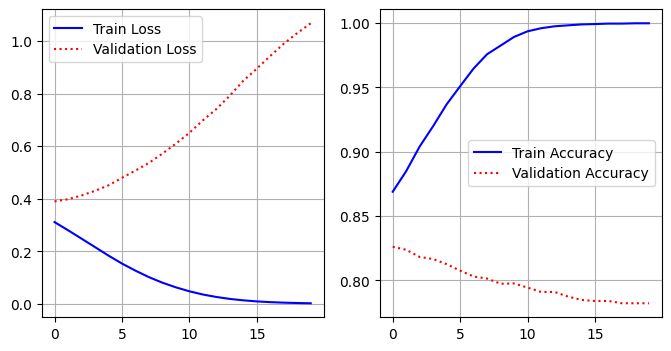

In [64]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

### 모델 평가

In [65]:
model.evaluate(padded_x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 1.0069 - acc: 0.7831


[1.0068997144699097, 0.783079981803894]

### 단어의 수를 늘린 후 재학습

In [66]:
num_words = 1000
max_len = 300

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

pad_x_train_2 = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test_2 = pad_sequences(x_test, maxlen=max_len, padding='pre')

데이터 확인

In [67]:
print(pad_x_train_2[:2])
#이번에는 padding으로 데이터를 늘린 것을 볼 수 있다.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1  14  22  16  43 530 973   2
    2  65 458   2  66   2   4 173  36 256   5  25 100  43 838 112  50 670
    2   9  35 480 284   5 150   4 172 112 167   2 336 385  39   4 172   2
    2  17 546  38  13 447   4 192  50  16   6 147   2  19  14  22   4   2
    2 469   4  22  71  87  12  16  43 530  38  76  15  13   2   4  22  17
  515  17  12  16 626  18   2   5  62 386  12   8 316   8 106   5   4   2
    2  16 480  66   2  33   4 130  12  16  38 619   5  25 124  51  36 135
   48  25   2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8
    4 107 117   2  15 256   4   2   7   2   5 723  36  71  43 530 476  26
  400 317  46   7   4   2   2  13 104 

In [68]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 32)           32000     
                                                                 
 flatten_4 (Flatten)         (None, 9600)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 9601      
                                                                 
Total params: 41601 (162.50 KB)
Trainable params: 41601 (162.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [71]:
history2 = model.fit(pad_x_train_2, y_train,
                    epochs=20, verbose=1,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 2s 4ms/step - loss: 0.4005 - acc: 0.8320 - val_loss: 0.3479 - val_acc: 0.8528
Epoch 2/20
625/625 [==============================] - 2s 4ms/step - loss: 0.3032 - acc: 0.8694 - val_loss: 0.3369 - val_acc: 0.8602
Epoch 3/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2642 - acc: 0.8923 - val_loss: 0.3375 - val_acc: 0.8584
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2271 - acc: 0.9117 - val_loss: 0.3681 - val_acc: 0.8472
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1886 - acc: 0.9315 - val_loss: 0.3785 - val_acc: 0.8466
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 0.1513 - acc: 0.9503 - val_loss: 0.3768 - val_acc: 0.8530
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 0.1184 - acc: 0.9652 - val_loss: 0.4181 - val_acc: 0.8392
Epoch 8/20
625/625 [==============================] - 2s 4ms/step - loss: 0.

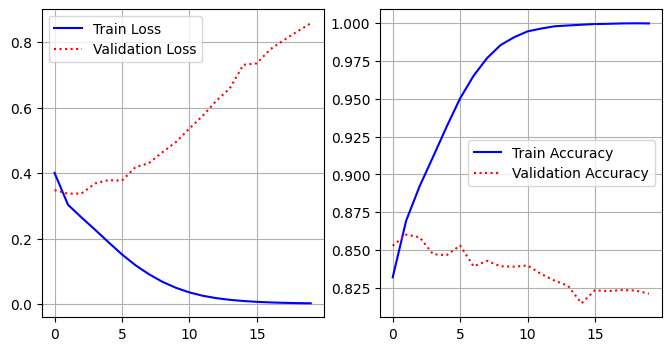

In [72]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history2.history['loss'], 'b-', label='Train Loss')
plt.plot(history2.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history2.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history2.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [76]:
model.evaluate(pad_x_test_2, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8499 - acc: 0.8228


[0.8498568534851074, 0.8228399753570557]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


**이 모델은 무엇일까?**

위에서 설명된 모델은 간단한 신경망 구조를 가지고 있으며, 특히 자연어 처리(Natural Language Processing, NLP)에 사용되는 기본적인 딥러닝 모델입니다. 이 모델은 다음과 같이 구분해서 설명할 수 있습니다:

- 텍스트 분류(Text Classification) 모델: 이 모델은 입력된 텍스트 데이터를 기반으로 이진 분류를 수행하는 것이 목적입니다. 예를 들어, 긍정적인 리뷰인지 부정적인 리뷰인지를 판별할 수 있습니다.
- 순차 모델(Sequential Model): Keras에서 제공하는 Sequential 클래스를 사용하여 각 층을 순차적으로 쌓아 올린 구조입니다. 이는 각 층이 이전 층의 출력을 바로 다음 층의 입력으로 사용하는 전형적인 층 기반 모델입니다.
- 임베딩(Embedding)을 포함한 신경망: 첫 번째 층에서 Embedding 층을 사용하여 텍스트 데이터를 고차원에서 저차원으로 임베딩하는 과정을 포함합니다. 이는 단어의 의미를 벡터 공간에 표현하는 과정으로, 단어 간의 의미적 관계를 반영할 수 있게 합니다.
- 완전 연결 신경망(Fully Connected Neural Network) 또는 다층 퍼셉트론(Multilayer Perceptron, MLP): Flatten 층을 통해 데이터를 1차원으로 펼친 후, Dense 층을 사용하여 완전 연결 계층을 형성합니다. 이는 가장 기본적인 형태의 신경망 구조 중 하나입니다.
- 따라서, 이 모델은 '이진 분류를 위한 순차적 임베딩 신경망' 또는 간단하게 '임베딩을 사용한 텍스트 분류 신경망'이라고 부를 수 있습니다.

다음에는 RNN, CNN을 사용해 성능을 비교해보기로 하자.

## Word2Vec

- Word2Vec은 자연어 처리 분야에서 널리 사용되는 단어 임베딩(word embedding) 기법 중 하나입니다. 구글의 연구팀에 의해 개발되었고, 고차원의 텍스트 데이터를 저차원의 벡터 공간으로 변환하는 방법을 제공합니다. 이 변환을 통해 단어들 사이의 의미적 관계를 수치적으로 표현할 수 있게 됩니다.

Word2Vec의 주요 특징은 다음과 같습니다:

- 분산 표현(Distributed Representation): 단어의 의미를 벡터의 여러 차원에 분산시켜 표현합니다. 이는 각 차원이 특정 의미를 담고 있으며, 단어의 의미를 벡터 공간에서의 위치로 나타냅니다.
- 문맥 이해(Contextual Understanding): Word2Vec은 주변 단어(문맥)를 바탕으로 단어의 의미를 학습합니다. 비슷한 문맥에서 사용되는 단어들은 벡터 공간에서 가까운 위치에 임베딩됩니다.
- 차원 축소(Dimensionality Reduction): 원래의 텍스트 데이터는 매우 고차원일 수 있지만, Word2Vec을 사용하여 훨씬 낮은 차원의 벡터로 단어를 표현합니다. 이는 컴퓨터가 효율적으로 처리할 수 있게 해주며, 머신러닝 모델의 성능을 향상시킵니다.
- 단어의 유사성(Word Similarity): 벡터 공간에서의 코사인 유사도(cosine similarity) 같은 메트릭을 사용하여 단어 간의 유사성을 계산할 수 있습니다. 유사한 의미를 가진 단어들은 벡터 공간에서 서로 가까울 것입니다.

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

CBOW(Continuous Bag of Words)와 Skip-gram은 자연어 처리에서 단어의 벡터 표현을 얻기 위해 사용되는 두 가지 주요 방법입니다. 이들은 Word2Vec 모델에서 사용되며, 주변 단어를 기반으로 특정 단어의 임베딩을 학습합니다. 그러나 이 두 방법은 타겟 단어와 컨텍스트 단어를 다루는 방식이 다릅니다.

CBOW(Continuous Bag of Words)

- CBOW는 주변에 있는 단어들('컨텍스트 단어')를 사용하여 중심에 있는 타겟 단어를 예측합니다.
- 이 방법은 컨텍스트를 입력으로 받아 타겟 단어의 발생 확률을 최대화하는 방향으로 모델을 학습합니다.
- CBOW는 컨텍스트 단어들의 순서를 고려하지 않으며, 모든 컨텍스트 단어의 벡터를 평균내어 하나의 숨겨진 벡터를 생성합니다.
- 대규모 데이터셋에서 빠르게 학습할 수 있는 장점이 있으며, 빈도수가 많은 단어에 대해 잘 작동합니다.

Skip-gram

- Skip-gram은 중심에 있는 단어('타겟 단어')를 사용하여 주변에 있는 단어들('컨텍스트 단어')을 예측합니다.
- 타겟 단어로부터 컨텍스트 단어가 나타날 확률을 최대화하는 방향으로 모델을 학습시킵니다.
- Skip-gram은 타겟 단어로부터 컨텍스트의 각 단어를 독립적으로 예측하기 때문에, CBOW에 비해 더 많은 계산을 요구할 수 있습니다.
- 그러나 드물게 등장하는 단어나 구문에 대해서 더 효과적인 벡터 표현을 학습하는 경향이 있습니다.

결론적으로, CBOW는 컨텍스트를 통해 타겟을 예측하는 반면, Skipgram은 타겟을 통해 컨텍스트를 예측하는 방식으로 동작합니다. 선택하는 방법은 주로 사용하는 데이터셋의 크기와 목표하는 작업의 세부 요건에 따라 결정됩니다. 요건에 따라 결정됩니다.요건에 따라 결정됩니다.건에 따라 결정됩니다.

## T-SNE

* T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 차원 축소 알고리즘
* 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 이 T-SNE 알고리즘을 많이 이용

* t-sne는 가장 먼저 원 공간의 데이터 유사도 $p_{ij}$와 임베딩 공간의 데이터 유사도 $q_{ij}$를 정의
* $x_i$에서 $x_j$ 간의 유사도 $p_{j|i}$ 는 다음과 같이 정의

$$ p_{j|i} = \frac {exp({-|x_i - x_j|}^2 / 2  \sigma^2_i)}{\sum_{k \neq i}exp({-|x_i - x_k|}^2 / 2  \sigma^2_i)} $$

* 설명하자면 $p_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 가중치 $\sigma^2_i$로 나눈 후, 이를 negative exponential을 취해 모든 점 간의 거리의 합과 나누어준 값으로 두 점 간의 거리가 가까울 수록 큰 값을 가짐

* 또한 임베딩 공간에서의 $y_i$에서 $y_j$ 간의 유사도 $q_{j|i}$ 는 다음과 같이 정의

$$ q_{j|i} = \frac {(1 + |y_i-y_j|^2)^{-1}}{\sum_{k \neq l}(1 + |y_i-y_j|^2)^{-1}} $$

* $q_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 1을 더해준 후 역수를 취한 값과 전체 합산 값과 나누어 유사도를 정의

* T-SNE의 학습은 $p_{j|i}$와 비슷해지도록 $q_{j|i}$의 위치를 조정하는 것이라고 할 수 있음



## 데이터 준비

In [77]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(shuffle=True, random_state=2,
                          remove=('headers', 'footers', 'quotes'))
docs = data.data
print(len(docs))

11314


In [78]:
docs[0]

"Something about how Koresh had threatened to cause local \nproblems with all these wepaons he had and was alleged to\nhave.  \n\nSomeone else will post more details soon, I'm sure.\n\nOther News:\nSniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect\nwas disgruntled employee of Universal Studios, which\nis a division of M.C.A.\n\n\nQUESTION:\nWhat will Californians do with all those guns after the Reginald\ndenny trial?"

## 전처리

In [79]:
import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
def clean_text(d):     #알파벳과 공백문자가 아닌 텍스트 삭제
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

In [81]:
def clean_stopword(d):
    stop_words = stopwords.words('english')
    result = ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w)>3])
    return result

In [82]:
def tokenize(d):   #빈칸 기준으로 단어를 나누는 토큰화
    return word_tokenize(d)

In [83]:
import pandas as pd

news_df = pd.DataFrame({'article':docs})
print(len(news_df))

11314


In [89]:
news_df.replace('', float('NaN'), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))
print(news_df.iloc[0][0])

11096
Something about how Koresh had threatened to cause local 
problems with all these wepaons he had and was alleged to
have.  

Someone else will post more details soon, I'm sure.

Other News:
Sniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect
was disgruntled employee of Universal Studios, which
is a division of M.C.A.


QUESTION:
What will Californians do with all those guns after the Reginald
denny trial?


In [90]:
# 전처리 (기호 삭제, 불용어 제거)
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
print(news_df.iloc[0][0])

something koresh threatened cause local problems wepaons alleged someone else post details soon sure news sniper injures outside buildling arrestedsuspect disgruntled employee universal studios division question californians guns reginald denny trial


In [91]:
# 빈칸 기준 토큰화
tokenized_df = news_df['article'].apply(tokenize)
tokenized_list = tokenized_df.to_list()
len(tokenized_list[0])

31

In [93]:
print(tokenized_list[0])

['something', 'koresh', 'threatened', 'cause', 'local', 'problems', 'wepaons', 'alleged', 'someone', 'else', 'post', 'details', 'soon', 'sure', 'news', 'sniper', 'injures', 'outside', 'buildling', 'arrestedsuspect', 'disgruntled', 'employee', 'universal', 'studios', 'division', 'question', 'californians', 'guns', 'reginald', 'denny', 'trial']


In [95]:
import numpy as np

# 단어하나짜리 문장 지우기
drop_news = [i for i, sentence in enumerate(tokenized_list) if len(sentence)<=1]
news_text = np.delete(np.array(tokenized_list, dtype=object), drop_news, axis=0)

print(len(news_text))

10939


## Gensim을 이용한 Word2Vec

### CBOW

In [96]:
from gensim.models import Word2Vec

C:\Users\master\anaconda3\envs\py38\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [97]:
model = Word2Vec(sentences=news_text, 
                 window=3,     # Maximum distance between the current and predicted word within a sentence
                 vector_size=100,     # Dimensionality of the word vectors
                 min_count=5,  # Ignores all words with total frequency lower than this
                 workers=4,    # Use these many worker threads to train the model (=faster training with multicore machines).
                 sg=0)         # 1 for skip-gram; otherwise CBOW.

In [98]:
model.wv.most_similar(positive=['soldiers'])

[('turkey', 0.9922395944595337),
 ('turks', 0.9846490025520325),
 ('genocide', 0.979028582572937),
 ('muslim', 0.9748655557632446),
 ('armenians', 0.9699466228485107),
 ('azeri', 0.9679301381111145),
 ('kurds', 0.9676873087882996),
 ('murdered', 0.9663020968437195),
 ('armenia', 0.9650161862373352),
 ('karabakh', 0.963092029094696)]

In [99]:
model.wv.most_similar(positive=['soldiers'], negative=['religion'])

[('period', 0.7337965965270996),
 ('pittsburgh', 0.6879974603652954),
 ('north', 0.6653953790664673),
 ('third', 0.6633926033973694),
 ('york', 0.6626687049865723),
 ('division', 0.6575782299041748),
 ('chicago', 0.656697690486908),
 ('vancouver', 0.6556744575500488),
 ('detroit', 0.6531383991241455),
 ('league', 0.6528706550598145)]

### Skip-gram

In [100]:
model = Word2Vec(sentences=news_text, 
                 window=3, 
                 vector_size=100,    
                 min_count=5, 
                 workers=4, 
                 sg=1)    #1 for skip-gram; otherwise CBOW.

In [101]:
model.wv.most_similar(positive=['soldiers'])

[('burned', 0.9409762024879456),
 ('azeri', 0.9388453960418701),
 ('wounded', 0.9364776015281677),
 ('murdered', 0.928916871547699),
 ('troops', 0.9246466755867004),
 ('karabakh', 0.9237154722213745),
 ('greeks', 0.9228474497795105),
 ('corpses', 0.9223815202713013),
 ('survivors', 0.9221004247665405),
 ('village', 0.9179053902626038)]

In [102]:
model.wv.most_similar(positive=['soldiers'], negative=['religion'])

[('went', 0.5299655795097351),
 ('door', 0.5267699956893921),
 ('puck', 0.522163987159729),
 ('dineen', 0.5148030519485474),
 ('town', 0.5134052634239197),
 ('broke', 0.5127241611480713),
 ('floor', 0.5034723877906799),
 ('baku', 0.48686710000038147),
 ('helicopter', 0.4837775230407715),
 ('shot', 0.482835978269577)]

### 임베딩 벡터 시각화

In [103]:
from gensim.models import KeyedVectors

# metadata.tsv와 tensor.tsv 데이터 생성
model.wv.save_word2vec_format('news_w2v')  
#Store the input-hidden weight matrix in the same format used by the original C word2vec-tool, for compatibility.

* metadata.tsv와 tensor.tsv 데이터 생성

In [104]:
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

C:\Users\master\anaconda3\envs\py38\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
2024-01-08 11:17:54,734 - word2vec2tensor - INFO - running C:\Users\master\anaconda3\envs\py38\lib\site-packages\gensim\scripts\word2vec2tensor.py -i news_w2v -o news_w2v
2024-01-08 11:17:54,734 - keyedvectors - INFO - loading projection weights from news_w2v
2024-01-08 11:17:55,945 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (16996, 100) matrix of type float32 from news_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-01-08T11:17:55.944949', 'gensim': '4.3.2', 'python': '3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'load_word2vec_format'}
2024-01-08 11:17:57,091 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2024-01-08 11:17:57,091 - word2vec2tensor - INFO - Tensor metadata file saved to 

* Embedding Projector: https://projector.tensorflow.org/

## Keras를 이용한 Word2Vec, Skipgram, CBOW 구현

출처: https://github.com/yeon93/NLP_study/blob/main/07_embedding.ipynb

### 1. Word2Vec

In [111]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(shuffle=True, random_state=2, remove=('headers', 'footers', 'quotes'))
docs = data.data

print(len(docs))
docs[0]          #이메일주소, 개행문자, 숫자 전처리 필요

11314


"Something about how Koresh had threatened to cause local \nproblems with all these wepaons he had and was alleged to\nhave.  \n\nSomeone else will post more details soon, I'm sure.\n\nOther News:\nSniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect\nwas disgruntled employee of Universal Studios, which\nis a division of M.C.A.\n\n\nQUESTION:\nWhat will Californians do with all those guns after the Reginald\ndenny trial?"

In [112]:
import pandas as pd

news_df = pd.DataFrame({'article':docs})
print(len(news_df)) 

news_df.replace('', float("NaN"), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))

news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df.tail(3)  #index가 맞지 않음

news_df = news_df.reset_index()
del news_df['index']

tokenized_news = news_df['article'].apply(tokenize)
tokenized_news =tokenized_news.to_list()

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1] 
news_texts = np.delete(np.array(tokenized_news, dtype='object'), drop_news, axis = 0)   

11314
11096


In [113]:
# 단어 사전 만들기
from tensorflow.keras.preprocessing.text import Tokenizer

news_2000 = news_texts[:2000]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_2000)

idx2word = {value:key for key, value in tokenizer.word_index.items()}
sequences = tokenizer.texts_to_sequences(news_2000)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size) 

27778


### 1. Skipgram

전처리에서 Negative Sampling
- Word2Vec은 출력층이 내놓는 값에 소프트맥스 함수를 적용해 확률값으로 변환한 후 이를 정답과 비교해 역전파
- 소프트맥스를 적용하려면 분모에 해당하는 값, 즉 중심단어와 나머지 모든 단어의 내적을 한 뒤, 이를 다시 exp 계산을 하는데 전체 단어가 많을 경우 엄청난 계산량 발생  
- 네거티브 샘플링은 소프트맥스 확률을 구할 때 전체 단어를 대상으로 구하지 않고, 일부 단어만 뽑아서 계산을 하는 방식
- 네거티브 샘플링 동작은 사용자가 지정한 윈도우 사이즈 내에 등장하지 않는 단어(negative sample)를 5~20개 정도 뽑고,
      
이를 정답단어와 합쳐 전체 단어처럼 소프트맥스 확률을 계산하여 파라미터 업데이트

In [114]:
from tensorflow.keras.preprocessing.sequence import skipgrams

skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in sequences[:10]] # 10개 단어 샘플
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("{:s}({:d}), {:s}({:d}) -> {:d}".format(idx2word[pairs[i][0]], pairs[i][0],
                                                  idx2word[pairs[i][1]], pairs[i][1],
                                                  labels[i]))
    
print(len(skip_grams), len(pairs), len(labels)) 

denny(12038), mdsaugwyuua(25122) -> 0
soon(455), betaxeroxcompubhash(26235) -> 0
buildling(12032), maczone(14800) -> 0
koresh(1028), cause(367) -> 1
post(161), problems(173) -> 1
10 1020 1020


In [115]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot

embed_size = 50

def word2vec():
    target_inputs = Input(shape=(1,), dtype='int32')
    target_embedding = Embedding(vocab_size, embed_size)(target_inputs)
    
    context_inputs = Input(shape=(1,), dtype='int32')
    context_embedding = Embedding(vocab_size, embed_size)(context_inputs)
    
    dot_product = Dot(axes=2)([target_embedding, context_embedding])
    dot_product = Reshape((1,), input_shape=(1,1))(dot_product)
    output = Activation('sigmoid')(dot_product)
    
    model = Model(inputs=[target_inputs, context_inputs], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

model = word2vec()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 1, 50)                1388900   ['input_1[0][0]']             
                                                                                                  
 embedding_6 (Embedding)     (None, 1, 50)                1388900   ['input_2[0][0]']             
                                                                                              

In [117]:
for epoch in range(1,11):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem] 
        Y = labels 
        loss += model.train_on_batch(X,Y) # 한번의 epoch에 여러 번 트레이닝
        
    print('Epoch : ', epoch, 'Loss : ', loss)

Epoch :  1 Loss :  6.931567072868347
Epoch :  2 Loss :  6.919040858745575
Epoch :  3 Loss :  6.9062260389328
Epoch :  4 Loss :  6.891113758087158
Epoch :  5 Loss :  6.872458457946777
Epoch :  6 Loss :  6.849158704280853
Epoch :  7 Loss :  6.820236682891846
Epoch :  8 Loss :  6.784835994243622
Epoch :  9 Loss :  6.742222785949707
Epoch :  10 Loss :  6.69179505109787


In [118]:
import gensim

f = open('skipgram.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i,:])))))
f.close()

skipgram = gensim.models.KeyedVectors.load_word2vec_format('skipgram.txt', binary=False)

In [119]:
skipgram.most_similar(positive=['soldiers'])

[('xtianity', 0.5880213975906372),
 ('sticker', 0.5396521687507629),
 ('drafting', 0.4956164062023163),
 ('dries', 0.4860883057117462),
 ('territories', 0.47066599130630493),
 ('choises', 0.46158650517463684),
 ('text', 0.46009787917137146),
 ('sucessful', 0.45387837290763855),
 ('grid', 0.4528486728668213),
 ('gospelas', 0.4480464458465576)]

In [120]:
skipgram.most_similar(positive=['soldiers'], negative=['religion'])

[('choises', 0.5382639765739441),
 ('xtianity', 0.5331427454948425),
 ('exhort', 0.515254557132721),
 ('disciple', 0.503258466720581),
 ('drafting', 0.49540311098098755),
 ('aggressively', 0.4876193106174469),
 ('stoppy', 0.48720163106918335),
 ('sucessful', 0.4858875572681427),
 ('loosest', 0.48520877957344055),
 ('complete', 0.4831027090549469)]

### 3. CBOW

In [121]:
def skipgram2cbow(skipgrams):
    cbows = []
    flag = 0
    for n in skip_grams:
        temp1 = []
        for t in n :
            if flag == 0:
                temp1.append(t)
            else:
                flag = 1
                temp2 = []
                for x in t:
                    temp2.append([x[1], x[0]])
                temp1.append(temp2)
        cbows.append(temp1)
    return cbows

cbows = skipgram2cbow(skip_grams)
pairs, labels = cbows[0][0], cbows[0][1]
for i in range(5):
    print('{:s}({:d}), {:s}({:d}) -> {:d}'.format(
    idx2word[pairs[i][0]], pairs[i][0],
    idx2word[pairs[i][1]], pairs[i][1],
    labels[i]))
    
print(len(cbows), len(pairs), len(labels)) 

denny(12038), mdsaugwyuua(25122) -> 0
soon(455), betaxeroxcompubhash(26235) -> 0
buildling(12032), maczone(14800) -> 0
koresh(1028), cause(367) -> 1
post(161), problems(173) -> 1
10 1020 1020


In [122]:
model = word2vec()

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, 1, 50)                1388900   ['input_3[0][0]']             
                                                                                                  
 embedding_8 (Embedding)     (None, 1, 50)                1388900   ['input_4[0][0]']             
                                                                                            

In [124]:
for epoch in range(1,11):
    loss = 0
    for _, elem in enumerate(cbows):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem] 
        Y = labels 
        loss += model.train_on_batch(X,Y) # 한번의 epoch에 여러 번 트레이닝
        
    print('Epoch : ', epoch, 'Loss : ', loss)

Epoch :  1 Loss :  6.931365668773651
Epoch :  2 Loss :  6.918686628341675
Epoch :  3 Loss :  6.905610024929047
Epoch :  4 Loss :  6.890137553215027
Epoch :  5 Loss :  6.871027290821075
Epoch :  6 Loss :  6.8471720814704895
Epoch :  7 Loss :  6.817577481269836
Epoch :  8 Loss :  6.781360149383545
Epoch :  9 Loss :  6.737765669822693
Epoch :  10 Loss :  6.686176598072052


In [125]:
f = open('cbow.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i,:])))))
f.close()

cbow = gensim.models.KeyedVectors.load_word2vec_format('cbow.txt', binary=False)

In [126]:
cbow.most_similar(positive=['soldiers'])

[('pressed', 0.5663207769393921),
 ('treefold', 0.5345962047576904),
 ('cordon', 0.5061419010162354),
 ('cant', 0.5027245283126831),
 ('istiyor', 0.48892664909362793),
 ('excuse', 0.48290520906448364),
 ('molluscous', 0.48117485642433167),
 ('mhjcfjifbilykrenrkdphlhakskmnyc', 0.48078659176826477),
 ('advocating', 0.4739479124546051),
 ('pinch', 0.4700099229812622)]

In [127]:
cbow.most_similar(positive=['soldiers'], negative=['religion'])

[('fucking', 0.5660025477409363),
 ('pressed', 0.5180708169937134),
 ('churchgroup', 0.4760890007019043),
 ('spokane', 0.47185227274894714),
 ('bacterias', 0.4666007161140442),
 ('poker', 0.4612160325050354),
 ('unorthodox', 0.45622518658638),
 ('appreciated', 0.455735981464386),
 ('research', 0.45385825634002686),
 ('hypnotic', 0.45221462845802307)]